In [2]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers


folder_path = '/content/unzipped_folder/Animals'


X = []
y = []

In [1]:
import zipfile
import os

# Path to your zip file
zip_file_path = '/content/sounds.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/unzipped_folder')  # Specify the destination directory

# Verify the contents
os.listdir('/content/unzipped_folder')


['Animals']

In [3]:
import numpy as np
import librosa

def extract_features(file_path):
    try:

        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error encountered while parsing file: {e}")
        return None


In [4]:
class_labels = os.listdir(folder_path)


for label in class_labels:
    class_dir = os.path.join(folder_path, label)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            if file_name.endswith('.wav'):
                try:
                    features = extract_features(file_path)
                    X.append(features)
                    y.append(label)
                    print(f"Processed file: {file_path}")
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")


y = [class_labels.index(label) for label in y]

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Processed file: /content/unzipped_folder/Animals/cat/171b56dc_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/f4386675_nohash_1.wav
Processed file: /content/unzipped_folder/Animals/cat/87014d40_nohash_2.wav
Processed file: /content/unzipped_folder/Animals/cat/9c06a3f3_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/1bc45db9_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/0e5193e6_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/b3bdded5_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/f632210f_nohash_1.wav
Processed file: /content/unzipped_folder/Animals/cat/a8cf01bc_nohash_1.wav
Processed file: /content/unzipped_folder/Animals/cat/b12bef84_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/5c8af87a_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/efbc3952_nohash_0.wav
Processed file: /content/unzipped_folder/Animals/cat/95ba4996_nohash_1.wav
Processed file: /content/

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(488, 40)
(488,)
(122, 40)
(122,)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

model = models.Sequential([
    layers.Input(shape=(40,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_labels), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_test, y_test),
                    batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Save the model
model.save('audio_classification_model.h5')

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3147 - loss: 37.9010 - val_accuracy: 0.3115 - val_loss: 25.7904
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3216 - loss: 18.1387 - val_accuracy: 0.3689 - val_loss: 2.5261
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4035 - loss: 14.4381 - val_accuracy: 0.3770 - val_loss: 7.8802
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4095 - loss: 9.7057 - val_accuracy: 0.5984 - val_loss: 1.5218
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4729 - loss: 7.0468 - val_accuracy: 0.6066 - val_loss: 1.5543
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4564 - loss: 6.8916 - val_accuracy: 0.5656 - val_loss: 1.9289
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4946 - loss: 4.7868 - val_accuracy: 0.6393 - val_loss: 1.4789
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4789 - loss: 4.5998 - val_accuracy: 0.5902 - val_

Test Accuracy: 0.6885


In [8]:
import numpy as np
import tensorflow as tf
import librosa

def extract_features(file_path):
    try:
        # Load audio file
        audio, sample_rate = librosa.load(file_path, sr=None)  # Do not resample
        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        # Take the mean of the MFCC features
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error encountered while parsing file: {e}")
        return None

model = tf.keras.models.load_model('audio_classification_model.h5')

custom_audio_path = '/content/recorded3.wav'

custom_features = extract_features(custom_audio_path)

if custom_features is not None:
    custom_features = np.array([custom_features])

    predicted_probabilities = model.predict(custom_features)

    predicted_class_index = np.argmax(predicted_probabilities, axis=1)

    predicted_label = class_labels[predicted_class_index[0]]

    print(f"Predicted class: {predicted_label}")
else:
    print("Feature extraction failed for the custom audio file.")


Error encountered while parsing file: [Errno 2] No such file or directory: '/content/recorded3.wav'
Feature extraction failed for the custom audio file.


<ipython-input-8-14c1122a036c>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)  # Do not resample
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [10]:
import IPython.display as ipd
ipd.Audio(custom_audio_path)

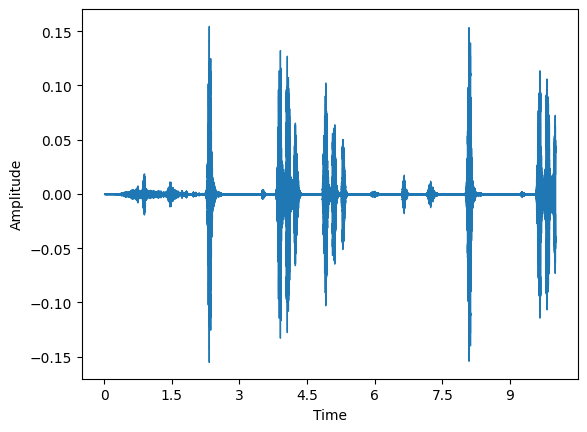

In [11]:
import matplotlib.pyplot as plt
import librosa.display
x,sr=librosa.load(custom_audio_path)
librosa.display.waveshow(x)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


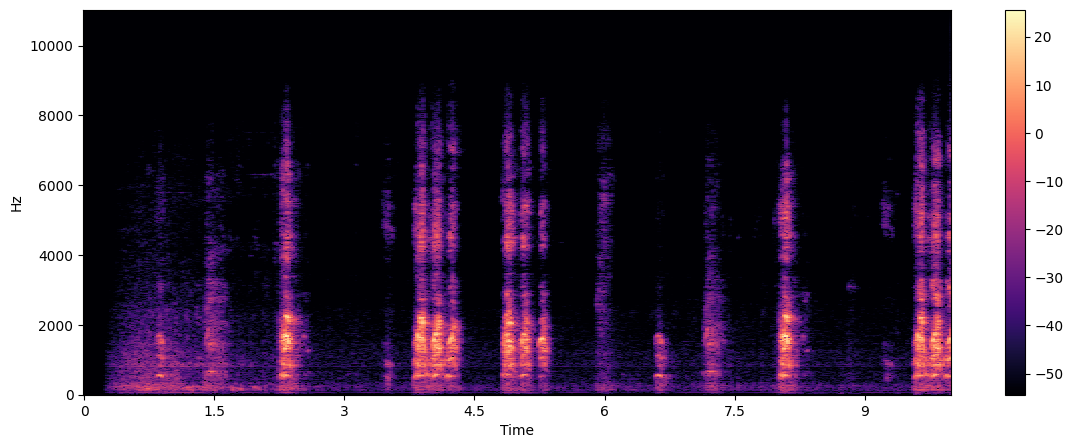

In [12]:
X=librosa.stft(x)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

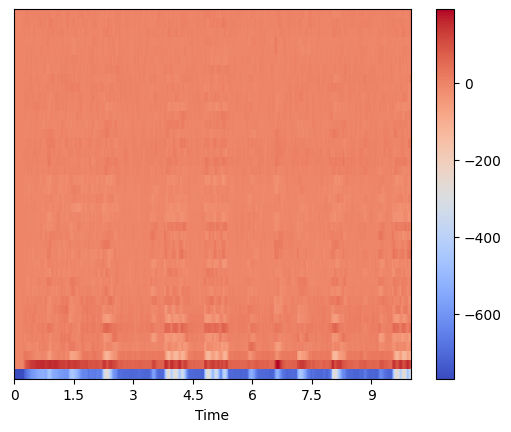

In [13]:
mfccs=librosa.feature.mfcc(y=np.array(x),sr=sr,n_mfcc=40)
librosa.display.specshow(mfccs,x_axis='time')
plt.colorbar()
plt.show()

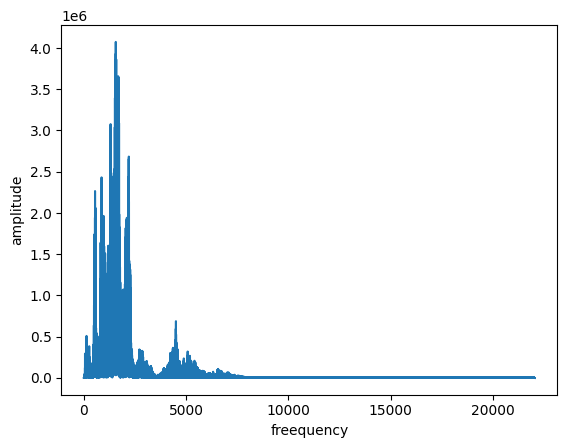

In [14]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
import numpy as np
from matplotlib import pyplot as plt
s_rate, signal = wavfile.read('/content/recorded3.wav')
FFT = abs(fftpk.fft(signal))
freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
plt.plot(freqs[range(len(FFT)//2)], FFT[range(len(FFT)//2)])
plt.xlabel('freequency')
plt.ylabel('amplitude')
plt.show()

In [15]:
std = np.std(freqs)
maxv = np.amax(freqs)
minv = np.amin(freqs)
median = np.median(freqs)
mean = np.mean(freqs)
skew = scipy.stats.skew(freqs)
kurt = scipy.stats.kurtosis(freqs)
q1 = np.quantile(freqs, 0.25)
q3 = np.quantile(freqs, 0.75)
mode = scipy.stats.mode(freqs)
iqr = scipy.stats.iqr(freqs)
print(median)
print(mean)
print(std)
print(maxv)
print(minv)
print(skew)
print(kurt)
print(q1)
print(q3)
print(mode)
print(iqr)

-0.05
-0.05000000000001373
12730.573435598517
22049.9
-22050.0
-1.846365350873497e-16
-1.200000000012339
-11025.025
11024.925000000001
ModeResult(mode=-22050.0, count=1)
22049.95
